In [3]:
from MieSppForce.simulation import SimulationConfig, SweepRunner,  DipoleCalculator, OpticalForceCalculator, CylindricalGrid

import numpy as np
from pint import UnitRegistry
ureg = UnitRegistry()

base_config = SimulationConfig(
    wl = 900 * ureg.nanometer,
    R =  (295/2) * ureg.nanometer,
    dist = 2 * ureg.nanometer,
    angle = np.deg2rad(25),
    delta= -np.pi/2,
    beta = np.pi/4,
    show_warnings=False,
    initial_field_type='two_beam'
)


In [4]:
XOY_AIR = CylindricalGrid(phi=np.linspace(0, 2*np.pi, 100)*ureg.rad, 
                          z=5*(base_config.dist+base_config.R),
                          r=base_config.wl*1)
XOY_SPP = CylindricalGrid(phi=np.linspace(0, 2*np.pi, 100)*ureg.rad, 
                          z=0*ureg.nm, 
                          r=base_config.wl*5)
sweep_param = 'R'
param_array = np.linspace(90, 165, 100)*ureg.nm

sweep_spp, diag_spp, _ = SweepRunner(base_config, sweep_param, param_array, True, True, True, False, XOY_SPP, 'spp').run(n_jobs=-1)

sweep_air, diag_air, _ = SweepRunner(base_config, sweep_param, param_array, True, True, True, False, XOY_AIR, 'reg').run(n_jobs=-1)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

/Users/semyon_b/git/SPP_ANALYTICAL/MieSppForce/green_func_v2.py:82: RuntimeWarning: divide by zero encountered in scalar divide
  lambda kr: rs(kr)*kr*k/kz(kr)*exp_fac(kr)*j0(kr*k*r),     # 5
/Users/semyon_b/git/SPP_ANALYTICAL/MieSppForce/green_func_v2.py:82: RuntimeWarning: invalid value encountered in scalar multiply
  lambda kr: rs(kr)*kr*k/kz(kr)*exp_fac(kr)*j0(kr*k*r),     # 5


  0%|          | 0/100 [00:00<?, ?it/s]

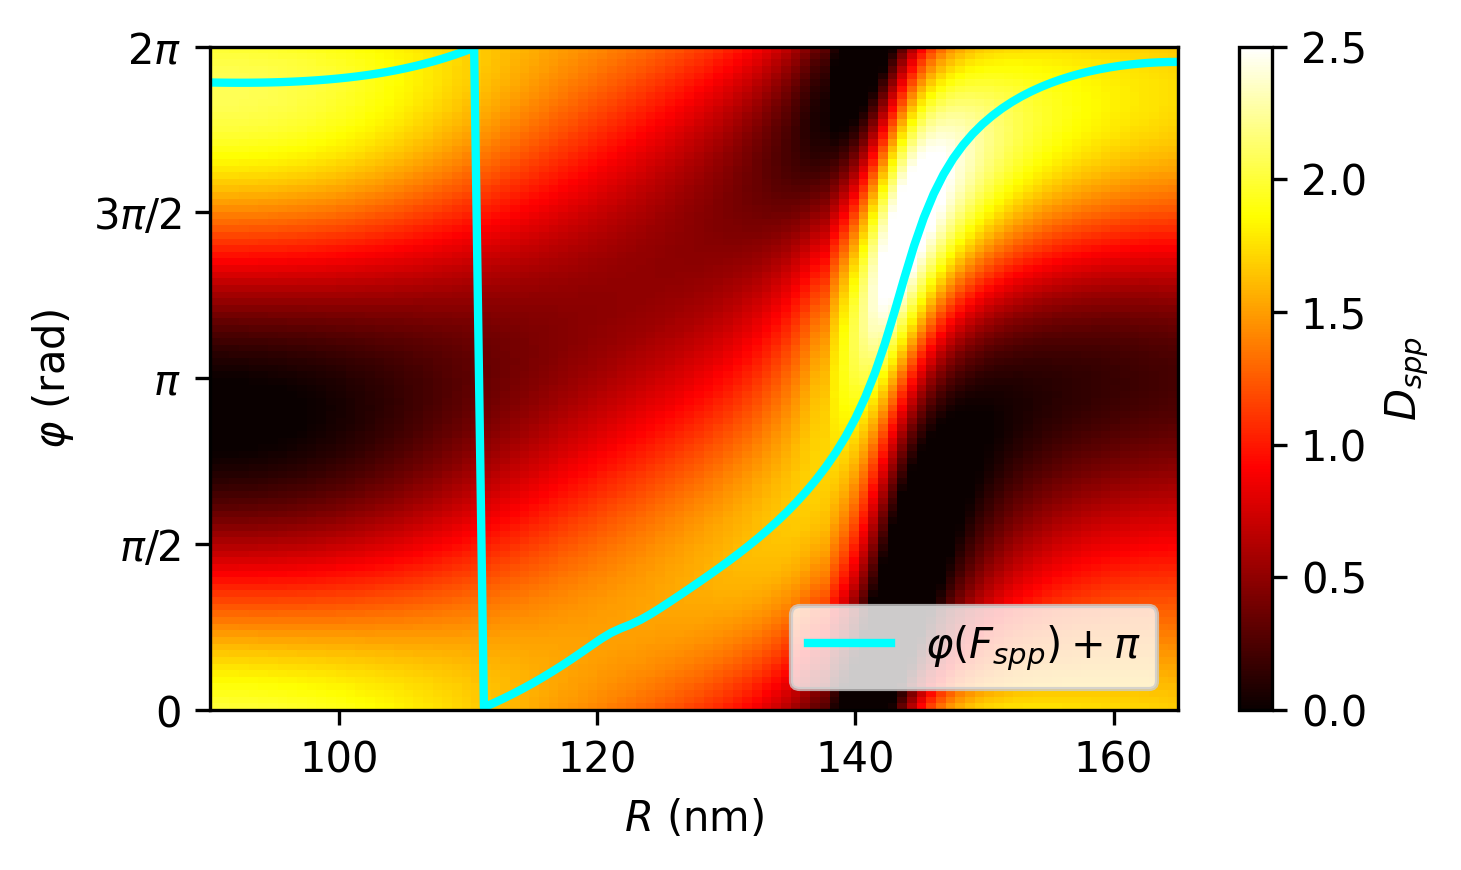

In [6]:
import numpy as np
import matplotlib.pyplot as plt

diag_spp["phi"] = diag_spp["phi"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)
diag_spp["R"]  = diag_spp["R"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)

pivot = diag_spp.pivot(index="phi", columns="R", values="D")

plt.figure(figsize=(5, 3), dpi=300)

plt.imshow(
    pivot.values.astype(float),
    aspect="auto",
    origin="lower",
    extent=[
        float(pivot.columns.min()), float(pivot.columns.max()),
        float(pivot.index.min()),   float(pivot.index.max())
    ],
    cmap="hot",
    vmin=0, vmax=2.5
)


Fx = sweep_spp["Fx"].apply(lambda x: x.to("N").magnitude).to_numpy()
Fy = sweep_spp["Fy"].apply(lambda x: x.to("N").magnitude).to_numpy()

Fxspp = sweep_spp["Fxspp"].apply(lambda x: x.to("N").magnitude).to_numpy()
Fyspp = sweep_spp["Fyspp"].apply(lambda x: x.to("N").magnitude).to_numpy()

Fxe0 = sweep_spp["Fxe0"].apply(lambda x: x.to("N").magnitude).to_numpy()
Fxm0 = sweep_spp["Fxm0"].apply(lambda x: x.to("N").magnitude).to_numpy()

Fx_nosc = Fx - Fxe0 - Fxm0

Rs = pivot.columns.values.astype(float)

# Добавление линии максимумов
plt.plot(Rs, np.atan2(Fyspp, Fxspp)+np.pi, color="cyan", linewidth=2, label="$\\varphi(F_{spp})+\\pi$")



plt.colorbar(label="$D_{spp}$")
plt.xlabel("$R$ (nm)")
plt.ylabel("$\\varphi$ (rad)")
# plt.title("$D$")

# Установка делений по оси Y в радианах
yticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
yticklabels = ["$0$", "$\\pi/2$", "$\\pi$", "$3\\pi/2$", "$2\\pi$"]

plt.yticks(yticks, yticklabels)
plt.ylim(0, 2*np.pi)
plt.tight_layout()
plt.legend()
# plt.savefig('plotsRNF/Dspp_map_R_Fspp.png', dpi=300)
plt.show()


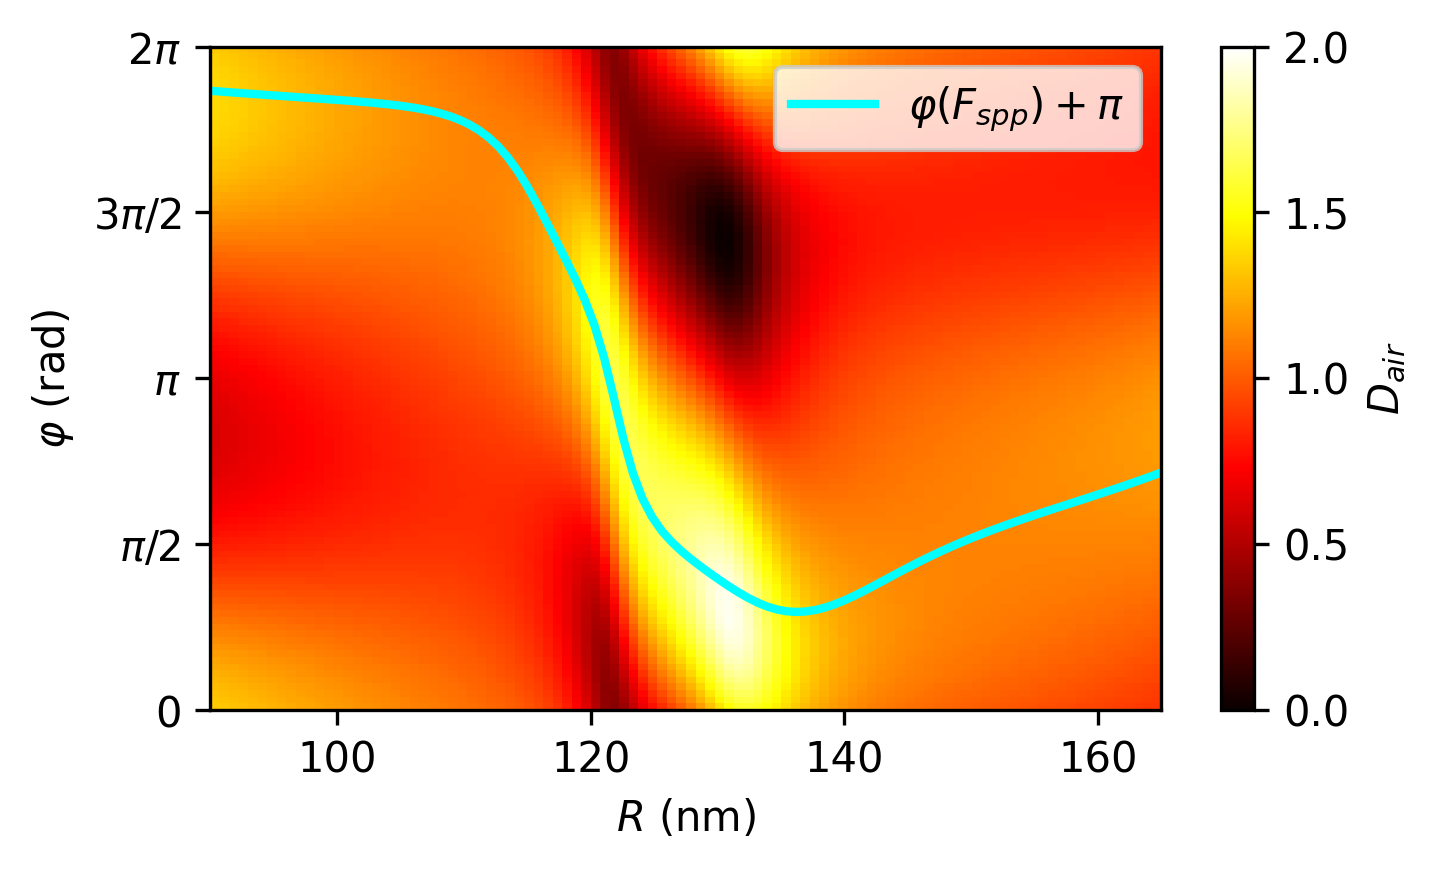

In [7]:
import numpy as np
import matplotlib.pyplot as plt

diag_air["phi"] = diag_air["phi"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)
diag_air["R"]  = diag_air["R"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x)

pivot = diag_air.pivot(index="phi", columns="R", values="D")

plt.figure(figsize=(5, 3), dpi=300)

plt.imshow(
    pivot.values.astype(float),
    aspect="auto",
    origin="lower",
    extent=[
        float(pivot.columns.min()), float(pivot.columns.max()),
        float(pivot.index.min()),   float(pivot.index.max())
    ],
    cmap="hot",
    vmin=0, vmax=2
)


Fx = sweep_spp["Fx"].apply(lambda x: x.to("N").magnitude).to_numpy()
Fy = sweep_spp["Fy"].apply(lambda x: x.to("N").magnitude).to_numpy()

Fxspp = sweep_spp["Fxspp"].apply(lambda x: x.to("N").magnitude).to_numpy()
Fyspp = sweep_spp["Fyspp"].apply(lambda x: x.to("N").magnitude).to_numpy()

Fxe0 = sweep_spp["Fxe0"].apply(lambda x: x.to("N").magnitude).to_numpy()
Fxm0 = sweep_spp["Fxm0"].apply(lambda x: x.to("N").magnitude).to_numpy()


Fx_air = Fx - Fxspp - Fxe0 - Fxm0
Fy_air = Fy - Fyspp

Rs = pivot.columns.values.astype(float)

# Добавление линии максимумов
plt.plot(Rs, np.atan2(Fy_air, Fx_air)+np.pi, color="cyan", linewidth=2, label="$\\varphi(F_{spp})+\\pi$")

# plt.plot(Rs, np.atan2(Fy, Fx)+np.pi, color="cyan", linewidth=2, label="$\\varphi(F_{spp})+\\pi$")


plt.colorbar(label="$D_{air}$")
plt.xlabel("$R$ (nm)")
plt.ylabel("$\\varphi$ (rad)")
# plt.title("$D$")

# Установка делений по оси Y в радианах
yticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
yticklabels = ["$0$", "$\\pi/2$", "$\\pi$", "$3\\pi/2$", "$2\\pi$"]

plt.yticks(yticks, yticklabels)
plt.ylim(0, 2*np.pi)
plt.tight_layout()
plt.legend()
# plt.savefig('plotsRNF/Dspp_map_R_Fspp.png', dpi=300)
plt.show()


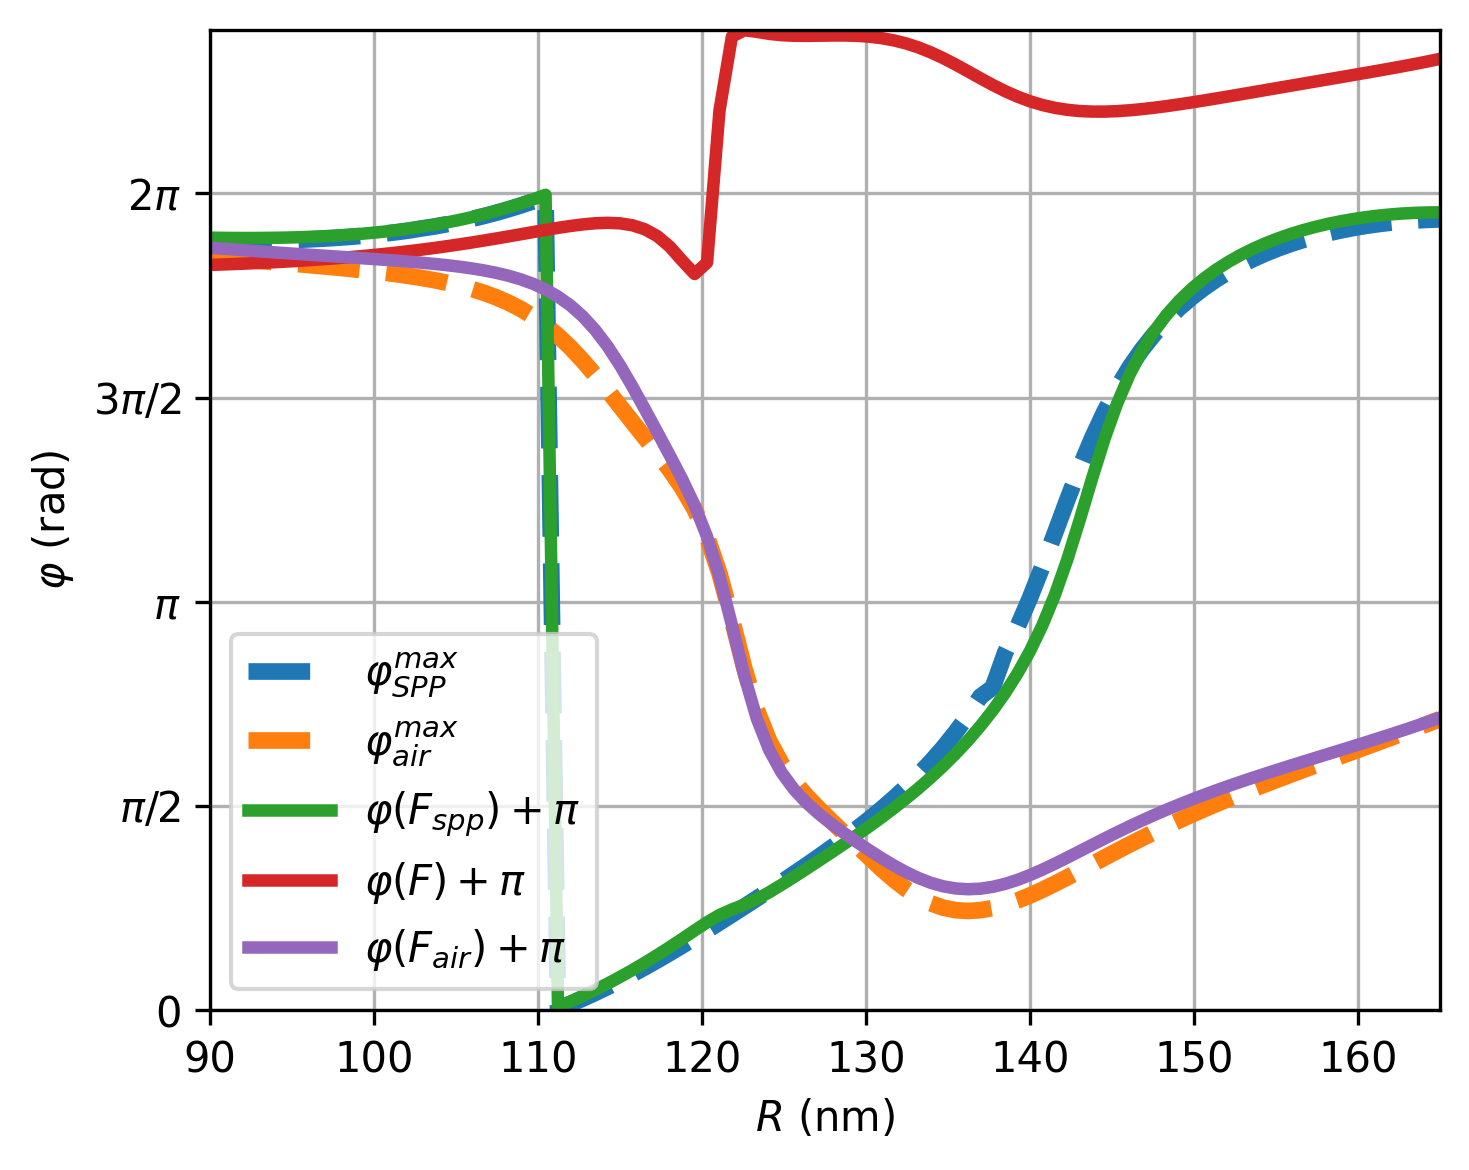

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def circular_mean_phi(df):
    wl_unique = df[sweep_param].unique()
    result = []
    for wl_val in wl_unique:
        sub = df[df[sweep_param] == wl_val]
        phi = sub["phi"].values.astype(float)
        D = sub["D"].values.astype(float)
        complex_sum = np.sum(D * np.exp(1j * phi))
        phi_mean = np.angle(complex_sum)
        if phi_mean < 0:
            phi_mean += 2*np.pi
        result.append([wl_val, phi_mean])
    return pd.DataFrame(result, columns=[sweep_param, "phi_mean"])

phi_mean_spp = circular_mean_phi(diag_spp)
phi_mean_air = circular_mean_phi(diag_air)

Fx_sc_nopress = Fx - Fxspp - Fxe0 - Fxm0

theta_F = np.arctan2(Fy, Fx)
# theta_F_nosc = np.arctan2(Fy_air, Fx_sc_nopress)
theta_F_spp = np.arctan2(Fyspp, Fxspp)
theta_F_air = np.arctan2(Fy_air, Fx_air)


df_forces = pd.DataFrame({sweep_param: Rs, "theta_F_spp": theta_F_spp, "theta_F": theta_F, "theta_F_air": theta_F_air })

plt.figure(figsize=(5,4), dpi=300)

plt.plot(phi_mean_spp[sweep_param], phi_mean_spp['phi_mean']+0*np.pi, label="$\\varphi_{SPP}^{max}$", lw=4, ls='--')

plt.plot(phi_mean_air[sweep_param], phi_mean_air['phi_mean']+0*np.pi, label="$\\varphi_{air}^{max}$", lw=4, ls='--')


plt.plot(Rs, df_forces["theta_F_spp"]+np.pi, label="$\\varphi(F_{spp})+\\pi$",  lw=3)
plt.plot(Rs, np.unwrap(df_forces["theta_F"])+np.pi, label="$\\varphi(F)+\\pi$",  lw=3)

#plt.plot(Rs, np.unwrap(df_forces["theta_F_nosc"])+np.pi, label="$\\varphi(F_{no press})+\\pi$",  lw=3)
plt.plot(Rs, np.unwrap(df_forces["theta_F_air"])+np.pi, label="$\\varphi(F_{air})+\\pi$",  lw=3)


yticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
yticklabels = ["$0$", "$\\pi/2$", "$\\pi$", "$3\\pi/2$", "$2\\pi$"]
plt.yticks(yticks, yticklabels)


plt.xlabel('$R$ (nm)')
plt.ylabel("$\\varphi$ (rad)")
plt.xlim(Rs.min(), Rs.max())
plt.ylim(0, 2*np.pi*1.2)
#plt.title(f"$\\lambda=${base_config.wl.magnitude} nm, $\\delta\\varphi=${np.rad2deg(base_config.phase)}, $\\beta=${np.rad2deg(base_config.a_angle)}")
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig(f'plotsRNF/phiD_phiFspp_phiFtot_MORE.png', dpi=300)

plt.show()

In [10]:
#Free Space

base_config_free_space = SimulationConfig(
    wl = 900 * ureg.nanometer,
    R =  (295/2) * ureg.nanometer,
    dist = 2 * ureg.nanometer,
    angle = np.deg2rad(0),
    delta = np.pi/2,
    beta= np.pi/4,
    substrate='Air'
)

sweep_res_free_space, _, _ = SweepRunner(base_config_free_space, sweep_param, param_array, True, False, True, False).run()



  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [02:06<?, ?it/s]


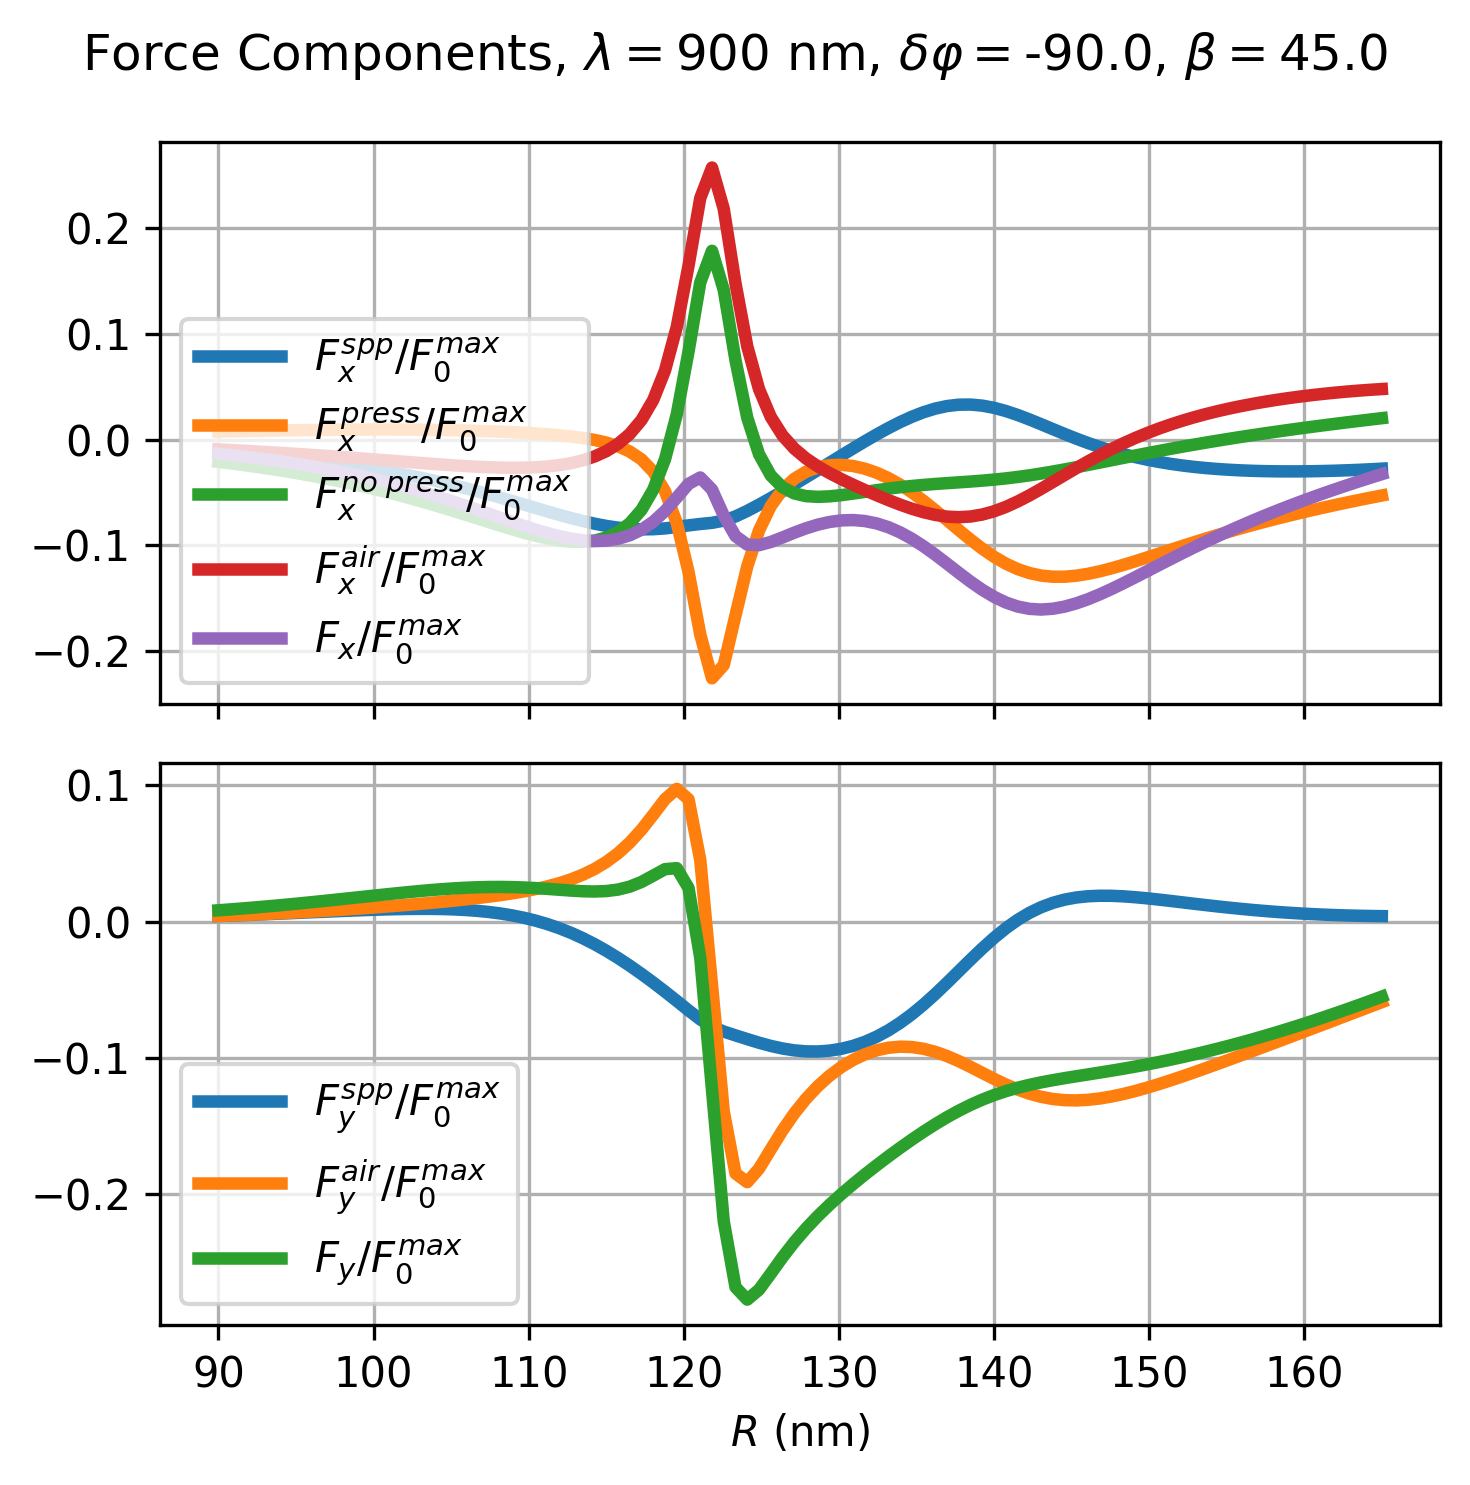

In [11]:
import numpy as np
import matplotlib.pyplot as plt

F0 = np.max(np.abs(sweep_res_free_space['Fz'].to_numpy())).magnitude


Fx_no_press = Fx - Fxe0 - Fxm0

Fx_press = Fxe0 + Fxm0

Fx_norm      = np.array([f / F0 for f in Fx])
Fx_nopress_norm  = np.array([f / F0 for f in Fx_no_press])
Fx_press_norm  = np.array([f / F0 for f in Fx_press])
Fx_air_norm = np.array([f / F0 for f in Fx_air])
Fx_spp_norm   =  np.array([f / F0 for f in Fxspp])



Fy_norm      =  np.array([f / F0 for f in Fy])
Fy_air_norm =  np.array([f / F0 for f in Fy_air])
Fy_spp_norm   = np.array([f / F0 for f in Fyspp])


fig, axs = plt.subplots(2, 1, figsize=(5, 5),dpi=300, sharex=True)

axs[0].plot(Rs, Fx_spp_norm, label="$F_x^{spp} / F_0^{max}$", lw=3)
axs[0].plot(Rs, Fx_press_norm, label="$F_x^{press} / F_0^{max}$", lw=3)
axs[0].plot(Rs, Fx_nopress_norm, label="$F_x^{no\\;press} / F_0^{max}$", lw=3)
axs[0].plot(Rs, Fx_air_norm, label="$F_x^{air} / F_0^{max}$", lw=3)
axs[0].plot(Rs, Fx_norm, label="$F_x/ F_0^{max}$", lw=3)
axs[0].legend(loc='lower left')
axs[0].grid(True)

axs[1].plot(Rs, Fy_spp_norm, label="$F_y^{spp} / F_0^{max}$", lw=3)
axs[1].plot(Rs, Fy_air_norm, label="$F_y^{air} / F_0^{max}$", lw=3)
axs[1].plot(Rs, Fy_norm, label="$F_y/ F_0^{max}$", lw=3)

# axs[1].set_ylabel("$F_y^{spp}$ / $F_0^{max}$")
axs[1].set_xlabel("$R$ (nm)")
axs[1].legend(loc='lower left')
axs[1].grid(True)

plt.suptitle(f"Force Components, $\\lambda=${base_config.wl.magnitude} nm, $\\delta\\varphi=${np.rad2deg(base_config.phase)}, $\\beta=${np.rad2deg(base_config.a_angle)}")
plt.tight_layout()
#plt.savefig(f'plots_diff_beta/F_comps_{base_config.wl.magnitude}_beta_{np.rad2deg(base_config.a_angle)}_phase_{np.rad2deg(base_config.phase)}.png', dpi=300)
plt.show()

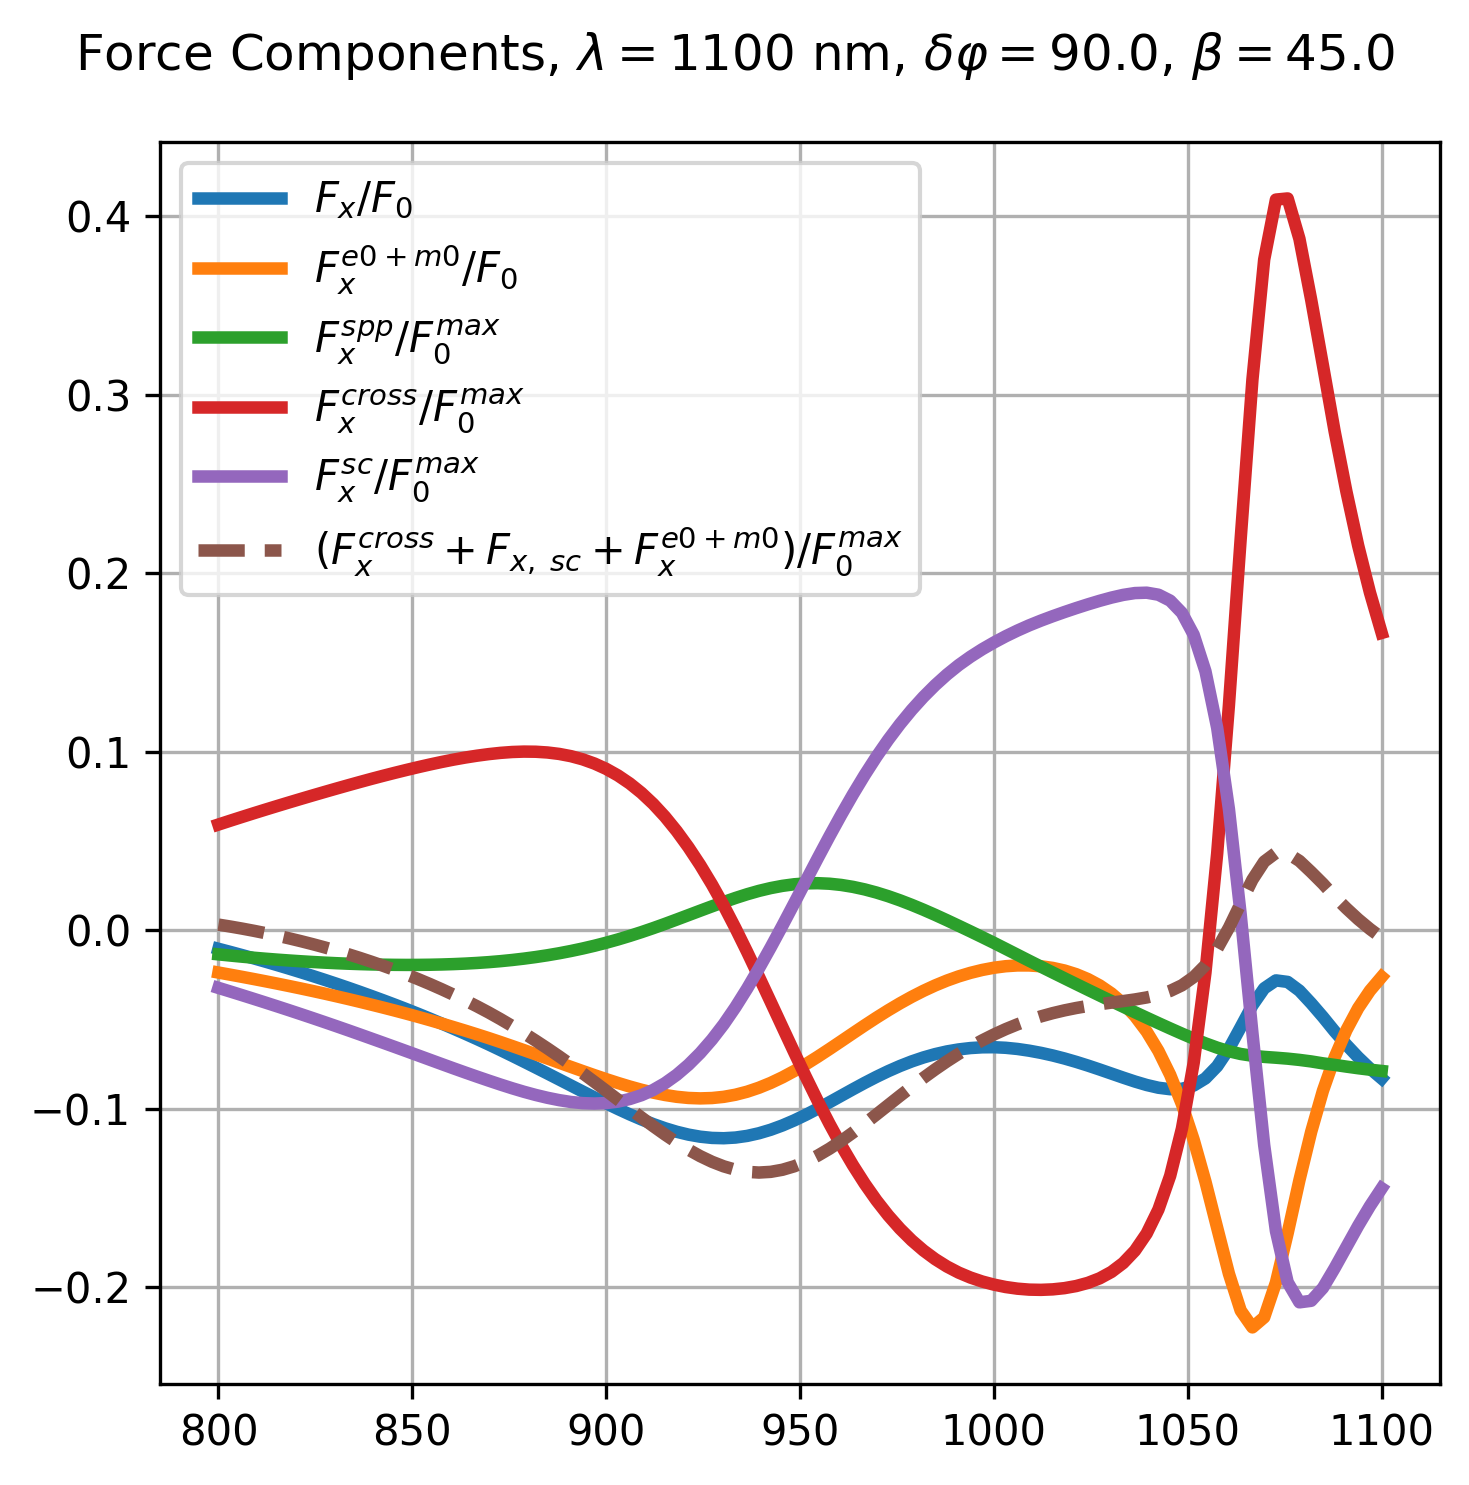

In [38]:

# --- графики ---
fig, ax = plt.subplots(1, 1, figsize=(5, 5),dpi=300, sharex=True)

#  X-компонента
ax.plot(wl, Fx_norm, label="$F_x / F_0$",lw=3)

ax.plot(wl, Fxe0_norm+Fxm0_norm, label="$F_x^{e0+m0} / F_0$",lw=3)


ax.plot(wl, Fxspp_norm, label="$F_x^{spp} / F_0^{max}$", lw=3)
ax.plot(wl, Fxcross_norm, label="$F_x^{cross} / F_0^{max}$", lw=3)
ax.plot(wl, Fx01_norm, label="$F_x^{sc} / F_0^{max}$", lw=3)
ax.plot(wl, Fxcross_norm+Fx01_norm+ Fxe0_norm+Fxm0_norm , label="$(F_x^{cross} +F_{x,\\;sc}+F_x^{e0+m0})  / F_0^{max}$", ls='--',lw=3)

# axs[0].set_ylabel("$F_x^{spp} / F_0^{max}$")
ax.legend(loc='upper left')
ax.grid(True)


plt.suptitle(f"Force Components, $\\lambda=${base_config.wl.magnitude} nm, $\\delta\\varphi=${np.rad2deg(base_config.phase)}, $\\beta=${np.rad2deg(base_config.a_angle)}")
plt.tight_layout()
#plt.savefig(f'plots_diff_beta/F_comps_{base_config.wl.magnitude}_beta_{np.rad2deg(base_config.a_angle)}_phase_{np.rad2deg(base_config.phase)}.png', dpi=300)
plt.show()

In [57]:
p_dip = np.loadtxt('two beam check/p_dips.txt', skiprows=8, delimiter=',')
m_dip = np.loadtxt('two beam check/m_dips.txt', skiprows=8, delimiter=',')
force_comsol = np.loadtxt('two beam check/tot_force.txt', skiprows=8, delimiter=',')

In [ ]:
# p_dip = np.loadtxt('one beam check/p_dips.txt', skiprows=8, delimiter=',')
# m_dip = np.loadtxt('one beam check/m_dips.txt', skiprows=8, delimiter=',')
# force_comsol = np.loadtxt('one beam check/tot force.txt', skiprows=8, delimiter=',')

  0%|          | 0/100 [02:48<?, ?it/s]


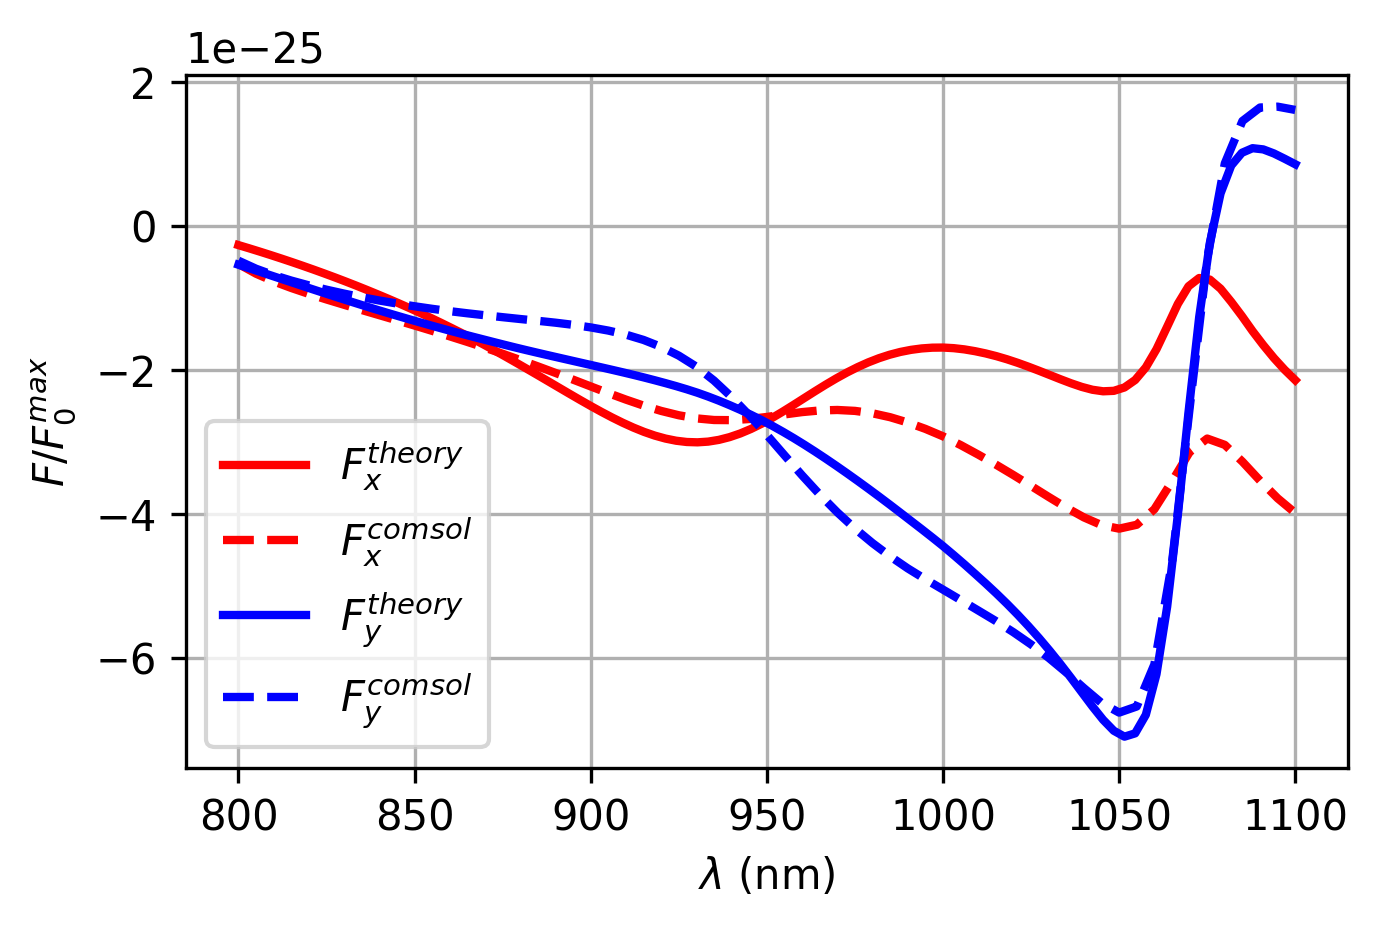

In [55]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wl, Fx, label='$F_x^{theory}$', c='r', lw=2)
plt.plot(force_comsol[:,0], force_comsol[:,1], label='$F_x^{comsol}$', c='r', lw=2, ls='--')
plt.plot(wl, Fy, label='$F_y^{theory}$', c='b', lw=2)
plt.plot(force_comsol[:,0], force_comsol[:,2], label='$F_y^{comsol}$', c='b', lw=2, ls='--')
plt.legend()
plt.grid()
plt.xlabel('$\\lambda$ (nm)')
plt.ylabel('$F/F_0^{max}$')
plt.show()

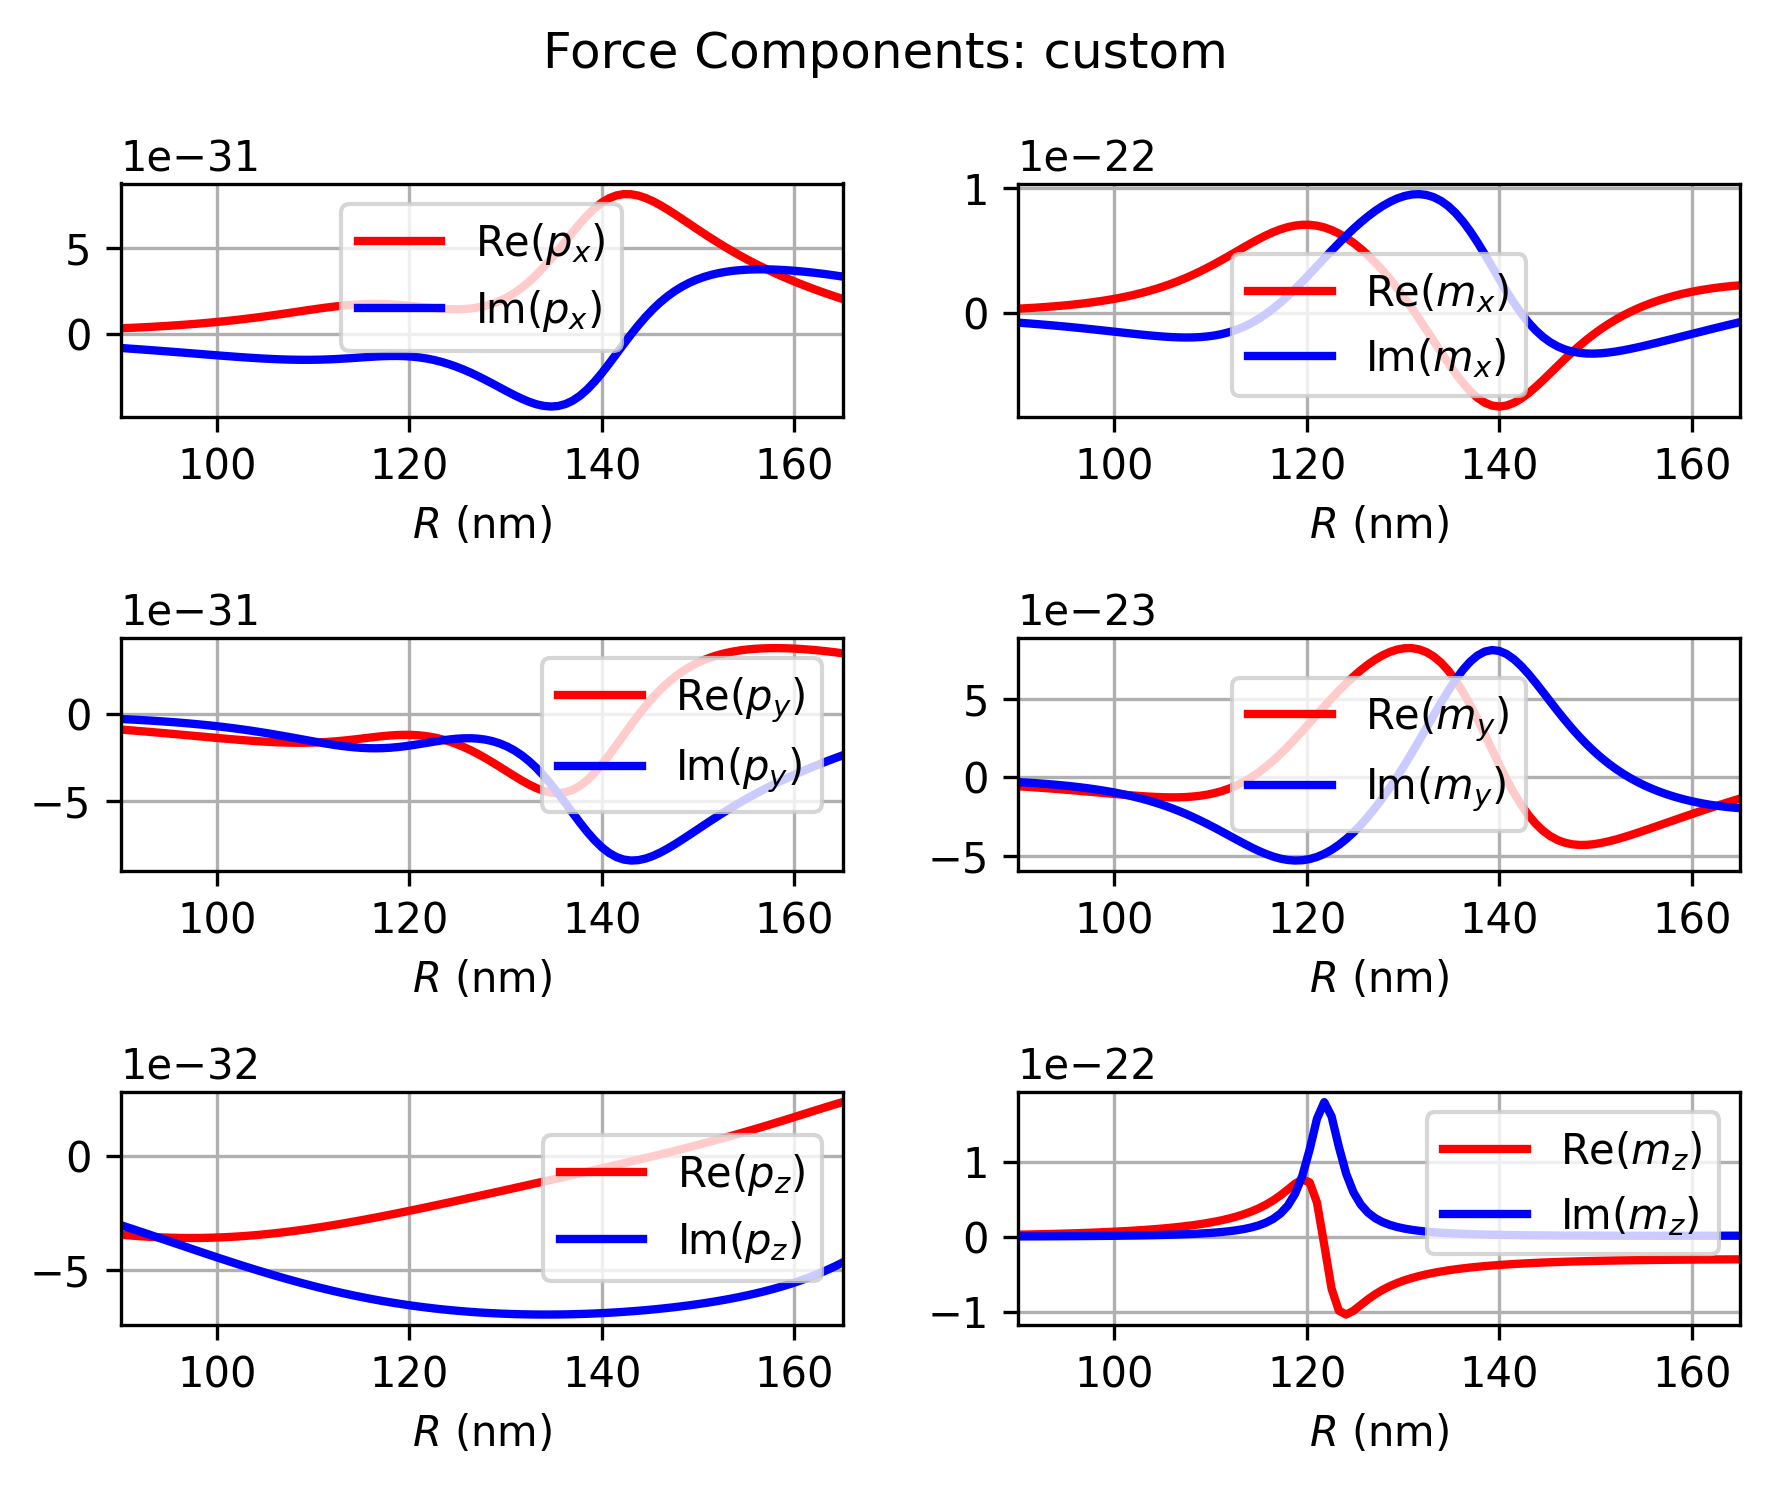

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# --- 2. Угол силы ---
px = sweep_spp["px"].apply(lambda x: x.magnitude).to_numpy()
py = sweep_spp["py"].apply(lambda x: x.magnitude).to_numpy()
pz = sweep_spp["pz"].apply(lambda x: x.magnitude).to_numpy()
mx = sweep_spp["mx"].apply(lambda x: x.magnitude).to_numpy()
my = sweep_spp["my"].apply(lambda x: x.magnitude).to_numpy()
mz = sweep_spp["mz"].apply(lambda x: x.magnitude).to_numpy()

dips=[[px,py,pz],[mx,my,mz]]

# dips_comsol = [[p_dip[:,1]-1j*p_dip[:,2], 
#                 p_dip[:,3]-1j*p_dip[:,4],
#                 p_dip[:,5]-1j*p_dip[:,6]],
#                [m_dip[:,1]-1j*m_dip[:,2], 
#                 m_dip[:,3]-1j*m_dip[:,4],
#                 m_dip[:,5]-1j*m_dip[:,6]]]

labels=[['$p_x$','$p_y$','$p_z$'],['$m_x$','$m_y$','$m_z$']]

# wls = sweep_res["wl"].apply(lambda x: x.magnitude if hasattr(x, "magnitude") else x).to_numpy()

# --- графики ---
fig, axs = plt.subplots(3, 2, figsize=(6, 5),dpi=300, sharex=False)

for i in range(2):
    for j in range(3):
        axs[j,i].plot(Rs, dips[i][j].real, label='Re('+labels[i][j]+')', lw=2, c='r')
        #axs[j,i].plot(p_dip[:,0], dips_comsol[i][j].real, lw=2, c='r', ls='--')
        axs[j,i].plot(Rs, dips[i][j].imag, label='Im('+labels[i][j]+')', lw=2, c='b')
        #axs[j,i].plot(p_dip[:,0], dips_comsol[i][j].imag, lw=2, c='b', ls='--')
        axs[j,i].legend()
        axs[j,i].grid()
        axs[j,i].set_xlabel('$R$ (nm)')
        # axs[j,i].set_ylabel(labels[i][j])
        axs[j,i].set_xlim(Rs.min(), Rs.max())
        

# axs[0].legend()
# axs[0].grid(True)

# # Y-компонента
# #axs[1].plot(wl, Fy_norm, label="$F_y / F_0^{max}$", lw=3)
# axs[1].plot(wl, Fy01, label="$F_{y,\\;sc}/ F_0^{max}$", lw=3)

# # axs[1].set_ylabel("$F_y^{spp}$ / $F_0^{max}$")
# axs[1].set_xlabel("$R$ (nm)")
# axs[1].legend()
# axs[1].grid(True)

plt.suptitle(f"Force Components: {base_config.initial_field_type}")
plt.tight_layout()
#plt.savefig('plotsRNF/dipole_moments.png', dpi=300)
plt.show()

In [59]:
press_force = np.loadtxt('two beam check/press_force.txt', skiprows=8, delimiter=',')

#press_force = np.loadtxt('one beam check/press force.txt', skiprows=8, delimiter=',')

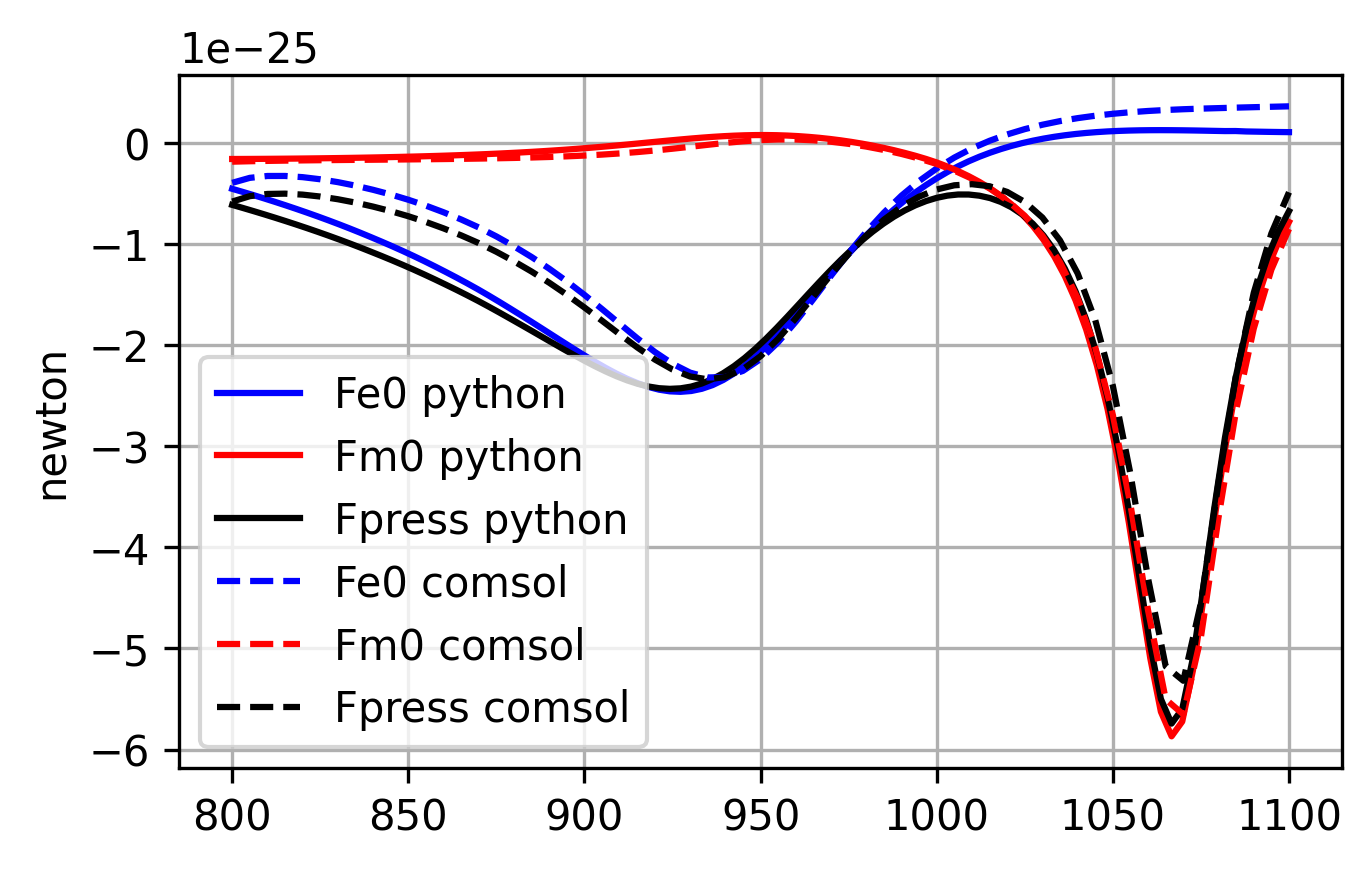

In [60]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, Fxe0, c='b', label='Fe0 python')
plt.plot(wls, Fxm0, c='r', label='Fm0 python')
plt.plot(wls, Fxm0+Fxe0, c='black', label='Fpress python')
plt.plot(press_force[:,0], press_force[:,1], c='b', ls='--', label='Fe0 comsol')
plt.plot(press_force[:,0], press_force[:,2], c='r', ls='--', label='Fm0 comsol')
plt.plot(press_force[:,0], press_force[:,1]+press_force[:,2], c='black', ls='--', label='Fpress comsol')
plt.grid()
plt.legend()

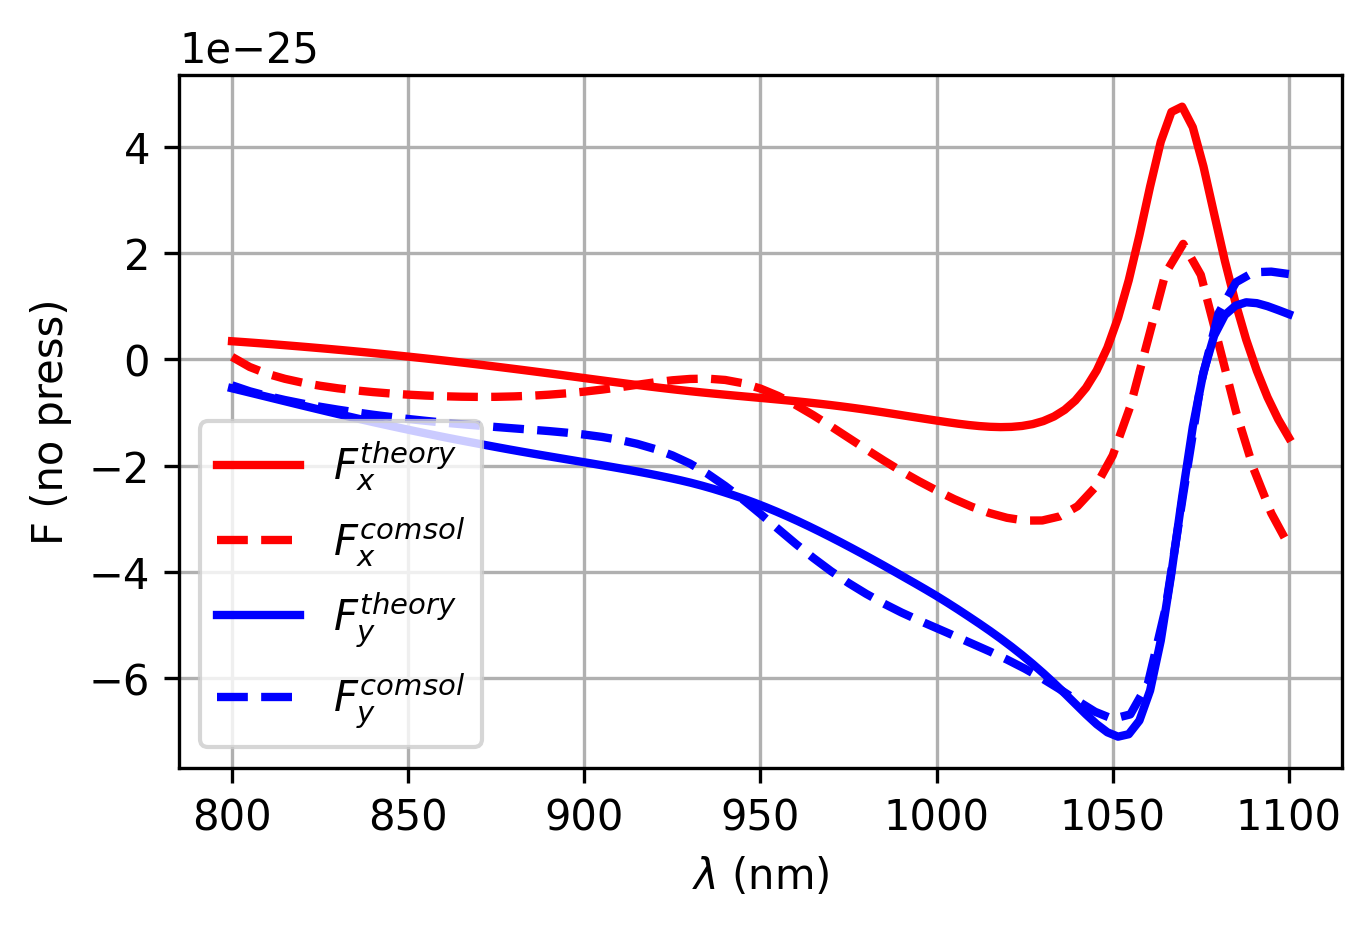

In [61]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wl, Fx-Fxe0-Fxm0, label='$F_x^{theory}$', c='r', lw=2)
plt.plot(force_comsol[:,0], force_comsol[:,1]-press_force[:,1]-press_force[:,2], label='$F_x^{comsol}$', c='r', lw=2, ls='--')
plt.plot(wl, Fy, label='$F_y^{theory}$', c='b', lw=2)
plt.plot(force_comsol[:,0], force_comsol[:,2], label='$F_y^{comsol}$', c='b', lw=2, ls='--')
plt.legend()
plt.grid()
plt.xlabel('$\\lambda$ (nm)')
plt.ylabel('F (no press)')
plt.show()

/var/folders/rm/jp69z42j5kv7gm1yn340dwx80000gn/T/ipykernel_80186/1473130021.py:94: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = plt.pcolormesh(xx, yy, Z, shading='auto', cmap='bwr', vmax=1e-2, vmin=-1e-2)


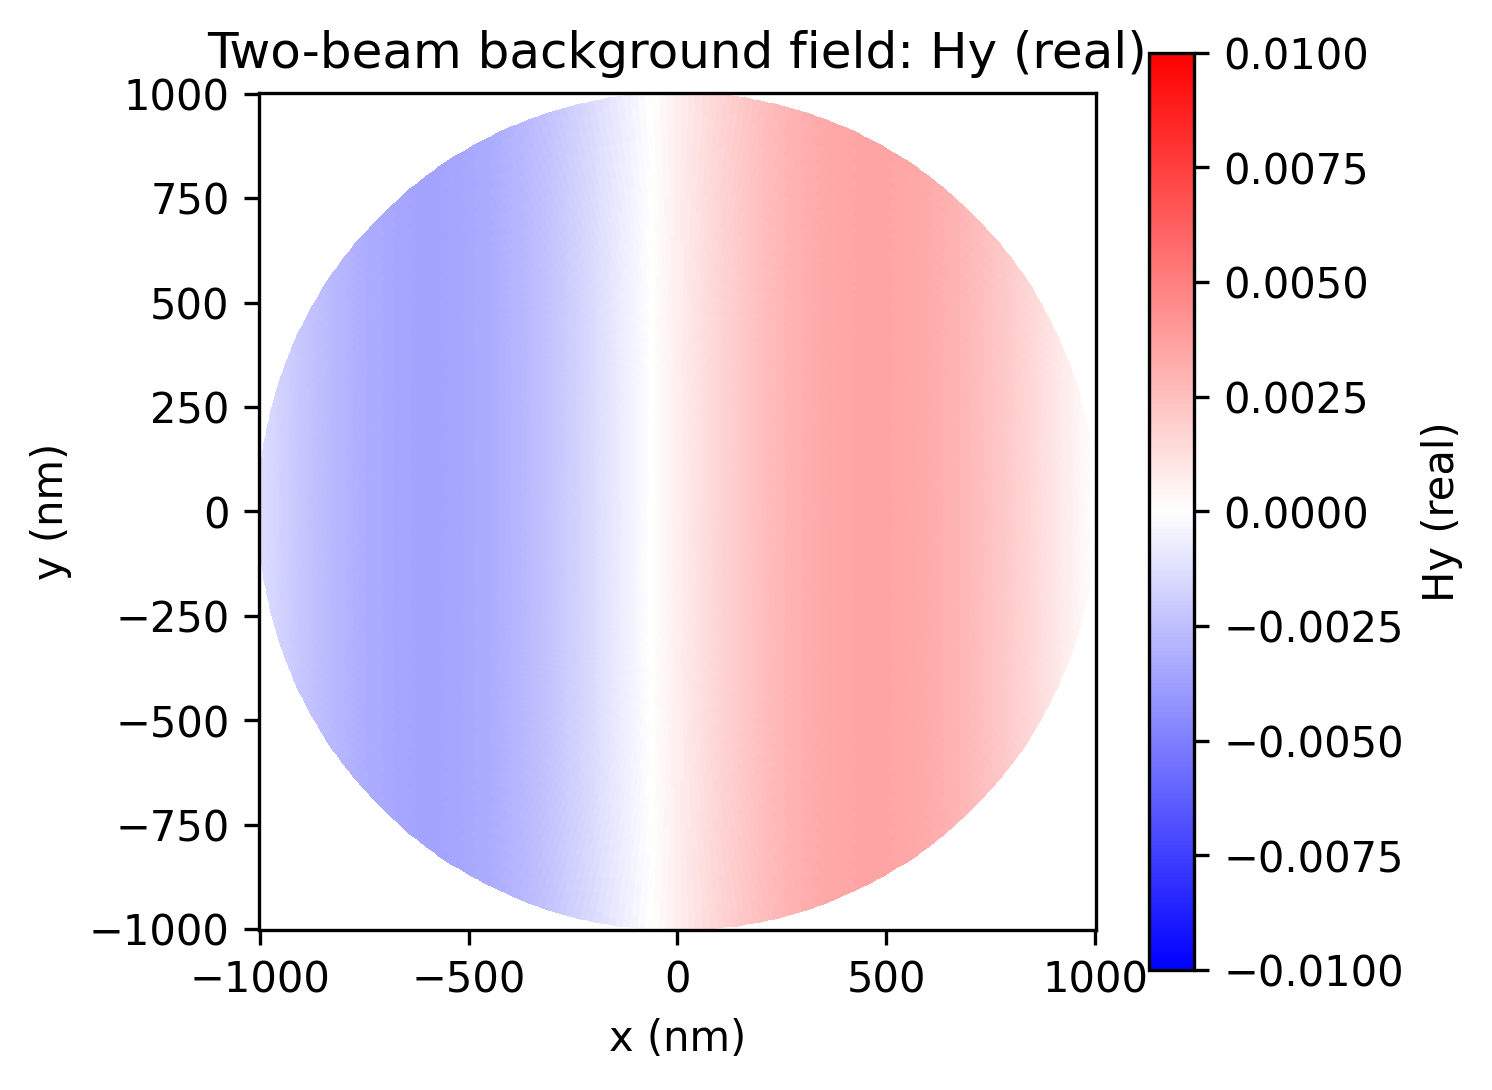

In [46]:
# Background field map using dipoles.field_two_beam_setup on a polar grid (two-beam setup)
# Builds (r,phi) grid -> (x,y), evaluates E,H at each point using field_two_beam_setup,
# and plots a selected component map. Choose component/value below.

import numpy as np
import matplotlib.pyplot as plt
from pint import UnitRegistry
from MieSppForce import dipoles, frenel

ureg = UnitRegistry()

# --- Parameters ---
wl_nm = 900.0                    # wavelength in nm
alpha = np.deg2rad(25)           # incidence angle (rad)
phase = np.pi/2                  # relative phase between beams
a_angle = np.pi/4                # polarization mixing angle
amplitude = 1.0                  # field amplitude scale
substrate = 'Au'                 # substrate for Fresnel coeffs

# Observation plane z (nm) relative to interface; z=0 at interface
z_obs_nm = 20

# Polar grid in nm and rad
Nr, Nphi = 200, 360
r_min_nm, r_max_nm = 1.0, 1000.0
r_vals = np.linspace(r_min_nm, r_max_nm, Nr)
phi_vals = np.linspace(0.0, 2*np.pi, Nphi, endpoint=False)

# Component selection: one of 'Ex','Ey','Ez','Hx','Hy','Hz'
component = 'Hy'  # <- change here
# How to visualize complex values: 'abs', 'real', or 'imag'
value_mode = 'real'

# --- Build mesh and evaluate background fields ---
rr, pp = np.meshgrid(r_vals, phi_vals, indexing='ij')  # rr: (Nr,Nphi), pp: (Nr,Nphi)
xx = rr * np.cos(pp)
yy = rr * np.sin(pp)

# Flatten for evaluation loop
xx_f = xx.ravel()
yy_f = yy.ravel()
zz_f = np.full_like(xx_f, z_obs_nm)

# Fresnel interpolation for substrate
eps_interp = frenel.get_interpolate(substrate)

# Storage arrays
Ex = np.empty_like(xx_f, dtype=np.complex128)
Ey = np.empty_like(xx_f, dtype=np.complex128)
Ez = np.empty_like(xx_f, dtype=np.complex128)
Hx = np.empty_like(xx_f, dtype=np.complex128)
Hy = np.empty_like(xx_f, dtype=np.complex128)
Hz = np.empty_like(xx_f, dtype=np.complex128)

# Evaluate background field at each point
for i in range(xx_f.size):
    xnm = float(xx_f[i])
    ynm = float(yy_f[i])
    znm = float(zz_f[i])
    E0, H0 = dipoles.field_two_beam_setup(
        wl=wl_nm,
        alpha=alpha,
        amplitude=amplitude,
        eps_interp=eps_interp,
        point=[xnm, ynm, znm],
        phase=phase,
        a_angle=a_angle
    )
    # E0, H0 are 3x1 arrays
    Ex[i], Ey[i], Ez[i] = E0[0,0], E0[1,0], E0[2,0]
    Hx[i], Hy[i], Hz[i] = H0[0,0], H0[1,0], H0[2,0]

# Reshape back to (Nr, Nphi)
Ex = Ex.reshape(Nr, Nphi)
Ey = Ey.reshape(Nr, Nphi)
Ez = Ez.reshape(Nr, Nphi)
Hx = Hx.reshape(Nr, Nphi)
Hy = Hy.reshape(Nr, Nphi)
Hz = Hz.reshape(Nr, Nphi)

# Pick component and value mode
comp_map = {'Ex': Ex, 'Ey': Ey, 'Ez': Ez, 'Hx': Hx, 'Hy': Hy, 'Hz': Hz}[component]
if value_mode == 'abs':
    Z = np.abs(comp_map)
elif value_mode == 'real':
    Z = np.real(comp_map)
elif value_mode == 'imag':
    Z = np.imag(comp_map)
else:
    raise ValueError("value_mode must be one of 'abs','real','imag'")

# --- Plot ---
plt.figure(figsize=(5,4), dpi=300)
mesh = plt.pcolormesh(xx, yy, Z, shading='auto', cmap='bwr', vmax=1e-2, vmin=-1e-2)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(mesh, label=f"{component} ({value_mode})")
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')
plt.title(f'Two-beam background field: {component} ({value_mode})')
plt.tight_layout()
plt.show()


In [14]:
crest_force = np.loadtxt('two beam check/f_crest.txt', skiprows=8, delimiter=',')

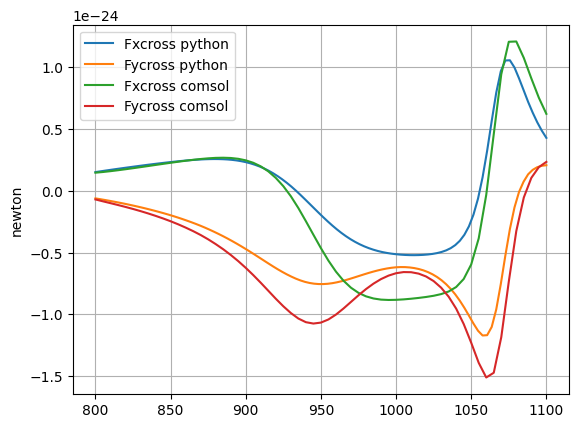

In [16]:
plt.plot(wls, Fxcross , label='Fxcross python')
plt.plot(wls, Fycross, label = 'Fycross python')
plt.plot(crest_force[:,0], crest_force[:,1] , label='Fxcross comsol')
plt.plot(crest_force[:,0], crest_force[:,2], label = 'Fycross comsol')
plt.grid()
plt.legend()
plt.show()


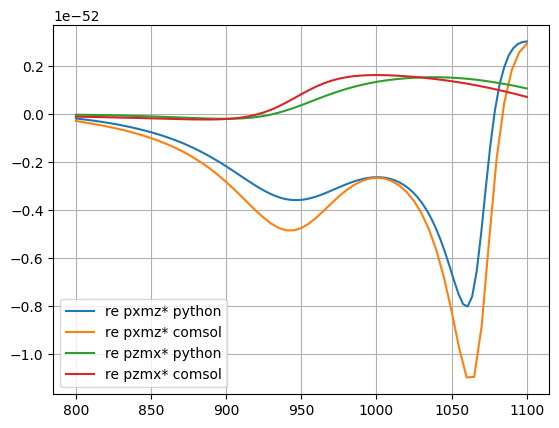

In [26]:
plt.plot(wls, np.real(dips[0][0]*dips[1][2].conj()), label='re pxmz* python')
plt.plot(p_dip[:,0], np.real(dips_comsol[0][0]*dips_comsol[1][2].conj()), label='re pxmz* comsol')


plt.plot(wls, np.real(dips[0][2]*dips[1][0].conj()), label='re pzmx* python')
plt.plot(p_dip[:,0], np.real(dips_comsol[0][2]*dips_comsol[1][0].conj()), label='re pzmx* comsol')


plt.grid()
plt.legend()

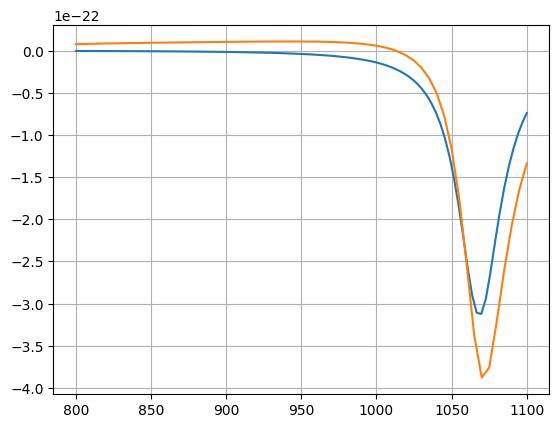

In [29]:
plt.plot(wls, np.real(dips[1][2].conj()), label='mz* python')
plt.plot(p_dip[:,0], np.real(dips_comsol[1][2].conj()), label='re mz* comsol')

plt.grid()

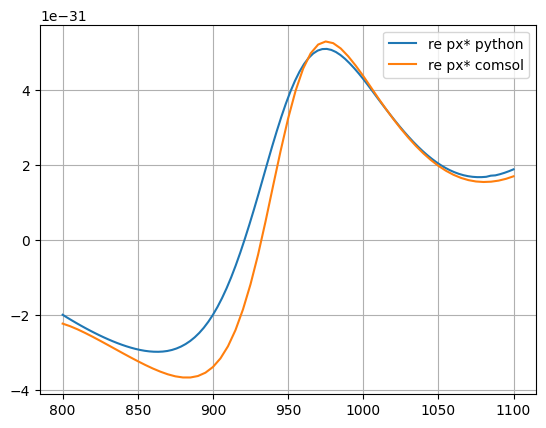

In [28]:

plt.plot(wls, np.real(dips[0][0]), label='re px* python')
plt.plot(p_dip[:,0], np.real(dips_comsol[0][0]), label='re px* comsol')
plt.grid()
plt.legend()